## Data Preprocessing and Feature Engineering

This notebook contains code for data preprocessing, feature engineering, and outlier detection and removal. The analysis utilizes several Python libraries, including numpy, pandas, matplotlib, and seaborn.

### Titanic Dataset

- Train Dataset: [Download Link](https://drive.google.com/file/d/1KzCzB54QCgKsfBi2T7yu1EopDR1wIolK/view?source=post_page-----d6bc219b6b93--------------------------------)

- Test Dataset: [Download Link](https://drive.google.com/file/d/1QPRuOmzwigrmCjoR1WYFU2i1ifps12Gt/view?source=post_page-----d6bc219b6b93--------------------------------)

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
train_df = pd.read_csv('application_train.csv')
test_df = pd.read_csv('titanic.csv')

In [6]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(307511, 122)

In [5]:
test_df.shape

(891, 12)

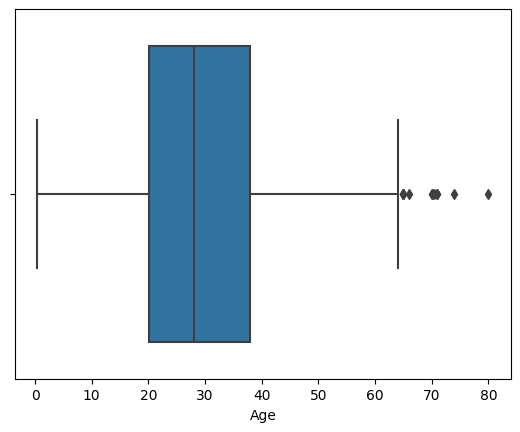

In [14]:
# Visualizing outliers in the numerical 'Age' column using a boxplot
# The resulting plot will show any outliers in the 'Age' column
sns.boxplot(x=test_df["Age"])
plt.show() 

In [15]:
# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) to find outliers
q1 = test_df["Age"].quantile(0.25)
q3 = test_df["Age"].quantile(0.75)
iqr = q3 - q1

# Determining the upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Identifying outliers outside the determined bounds
print(test_df[(test_df["Age"] < lower_bound) | (test_df["Age"] > upper_bound)])

     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

In [17]:
# Printing the index of outliers
print("Index of outliers:", test_df[(test_df["Age"] < lower_bound) | (test_df["Age"] > upper_bound)].index)

Index of outliers: Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


In [18]:
# Checking if there are any outliers
print("Are there any outliers?", test_df[(test_df["Age"] < lower_bound) | (test_df["Age"] > upper_bound)].any(axis=None))  # True

Are there any outliers? True


In [20]:
print("Are there any outliers below the threshold?", test_df[(test_df["Age"] < lower_bound)].any(axis=None))  # False

Are there any outliers below the threshold? False


## Generalized function

In [21]:
def outlier_thresholds(train_df, col_name, q1=0.25, q3=0.75):
    # Calculating quartiles and interquartile range
    quartile1 = train_df[col_name].quantile(q1)
    quartile3 = train_df[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    
    # Determining upper and lower limits for outlier detection
    upper_limit = quartile3 + 1.5 * interquartile_range
    lower_limit = quartile1 - 1.5 * interquartile_range
    
    # Age cannot be lower than 0, so we don't need to consider the lower limit
    
    return lower_limit, upper_limit

# Finding outlier thresholds for the 'Age' column
print("Outlier thresholds for Age:", outlier_thresholds(test_df, "Age"))  # (-6.6875, 64.8125)

Outlier thresholds for Age: (-6.6875, 64.8125)


In [22]:
# Finding and displaying outliers for the 'Fare' column
low, up = outlier_thresholds(test_df, "Fare")
print("Outliers in 'Fare' column:")
print(test_df[(test_df["Fare"] < low) | (test_df["Fare"] > up)].head())

Outliers in 'Fare' column:
    PassengerId  Survived  Pclass  \
1             2         1       1   
27           28         0       1   
31           32         1       1   
34           35         0       1   
52           53         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
31     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                            Meyer, Mr. Edgar Joseph    male  28.0      1   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

    Parch    Ticket      Fare        Cabin Embarked  
1       0  PC 17599   71.2833          C85        C  
27      2     19950  263.0000  C23 C25 C27        S  
31      0  PC 17569  146.5208          B78        C  
34      0  PC 17604   82.1708          NaN        C  
52      0  

In [24]:
# Function to check if there are any outliers in a column
def check_outlier(train_df, col_name):
    low_limit, up_limit = outlier_thresholds(train_df, col_name)
    # Checking if there are any values outside the determined thresholds
    if train_df[(train_df[col_name] > up_limit) | (train_df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# Checking for outliers in the 'Age' and 'Fare' columns
print("Are there any outliers in 'Age'?", check_outlier(test_df, "Age"))   
print("Are there any outliers in 'Fare'?", check_outlier(test_df, "Fare"))  

Are there any outliers in 'Age'? True
Are there any outliers in 'Fare'? True


In [26]:
# We'll now proceed to extract categorical columns, categorical columns with high cardinality, and numerical columns.
def grab_col_names(dataframe, cat_threshold=10, cardinality_threshold=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > cardinality_threshold and dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical columns: {len(cat_cols)}")
    print(f"Numerical columns: {len(num_cols)}")
    print(f"Categorical columns with high cardinality: {len(cat_but_car)}")
    print(f"Numerical columns that behave like categorical: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(test_df)

Observations: 891
Variables: 12
Categorical columns: 6
Numerical columns: 3
Categorical columns with high cardinality: 3
Numerical columns that behave like categorical: 4


## Removing Outliers

In [27]:
low, up = outlier_thresholds(test_df, "Fare")
filt = (test_df["Fare"] < low) | (test_df["Fare"] > up)
print("Number of Fare outlier entries:", test_df.shape[0] - test_df[~filt].shape[0])

Number of Fare outlier entries: 116


In [ ]:
## Generalized function for removing outliers

In [28]:
# Defining a function to remove outliers from a specific column in a DataFrame
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

cat_cols, num_cols, cat_but_car = grab_col_names(test_df)

Observations: 891
Variables: 12
Categorical columns: 6
Numerical columns: 3
Categorical columns with high cardinality: 3
Numerical columns that behave like categorical: 4


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

## Replacing the outliers with thresholds

In [33]:
# Defining a function to replace outliers with their respective thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

df = test_df
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols.remove('PassengerId')

Observations: 891
Variables: 12
Categorical columns: 6
Numerical columns: 3
Categorical columns with high cardinality: 3
Numerical columns that behave like categorical: 4


In [34]:
# Checking which column has outlier
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [35]:
# Replacing these outliers with thresholds.
for col in num_cols:
    replace_with_thresholds(df, col)
# After performing the replacement, there should be no outliers remaining in the dataset.
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


## Local Outlier Factor (LOF)

In [36]:
# Loading the 'diamonds' dataset from the seaborn library
df = sns.load_dataset('diamonds')
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
# Removing non-numeric columns from the DataFrame
df = df.select_dtypes(include=['float64', 'int64'])

# Dropping rows with missing values
df = df.dropna()

# Printing the shape of the dataset after the removal
print("Shape of the dataset after removal:", df.shape)   # (53940, 7)

# Displaying the first few rows of the modified dataset
print(df.head())

Shape of the dataset after removal: (53940, 7)
   carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75


In [38]:
# Checking for outliers in each column of the DataFrame
for col in df.columns:
    print(f"{col}: {check_outlier(df, col)}")

carat: True
depth: True
table: True
price: True
x: True
y: True
z: True


In [40]:
# Checking how many rows contain outliers in the 'carat' column
low, up = outlier_thresholds(df, "carat")
carat_outliers = df[((df["carat"] < low) | (df["carat"] > up))].shape[0]
print(f"Number of 'carat' outliers: {carat_outliers}")  # (1889)

Number of 'carat' outliers: 1889


In [41]:
# Checking how many rows contain outliers in the 'depth' column
low, up = outlier_thresholds(df, "depth")
depth_outliers = df[((df["depth"] < low) | (df["depth"] > up))].shape[0]
print(f"Number of 'depth' outliers: {depth_outliers}")  # (2545)

Number of 'depth' outliers: 2545


In [43]:
# Creating a Local Outlier Factor model with n_neighbors = 20
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_

# Displaying the outlier scores
print("Outlier scores:", df_scores)

# Sorting the outlier scores and displaying the first 5
print("Top 5 outlier scores:", np.sort(df_scores)[:5])

Outlier scores: [-1.58352526 -1.59732899 -1.62278873 ... -1.06721815 -1.00809552
 -1.00849038]
Top 5 outlier scores: [-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092]


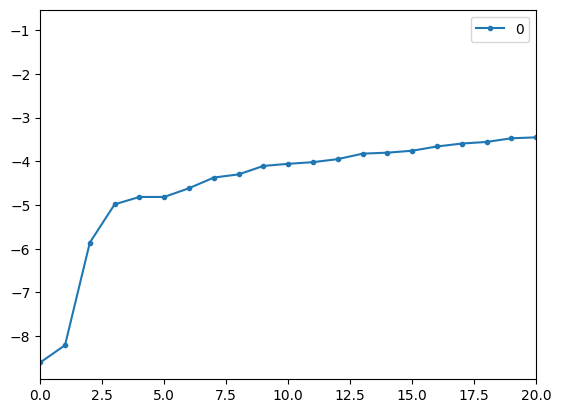

In [44]:
# Plotting the first 20 sorted outlier scores
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show() 

In [47]:
# Selecting the threshold value from the sorted outlier scores (4th point)
threshold = np.sort(df_scores)[3]
print("Threshold value:", threshold)

Threshold value: -4.984151747711709


In [49]:
# Filtering rows that have outlier scores below the threshold
outliers = df[df_scores < threshold]
print("Rows classified as outliers:")
print(outliers)

Rows classified as outliers:
       carat  depth  table  price     x      y      z
41918   1.03   78.2   54.0   1262  5.72   5.59   4.42
48410   0.51   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51   61.8   55.0   2075  5.15  31.80   5.12


In [50]:
# Dropping the rows identified as outliers from the dataset
cleaned_df = df.drop(axis=0, labels=df[df_scores < threshold].index)

# Printing the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", cleaned_df.shape)  # (53937, 7)

Shape of the dataset after removing outliers: (53937, 7)
